In [2]:
import pandas as pd
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
sample = pd.read_csv("./data/sample_submission.csv")

C:\Users\Koke\AppData\Local\Temp\ipykernel_24136\4021178954.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [4]:
test.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0


In [5]:
train.drop(columns = 'id', inplace = True)
test.drop(columns = 'id', inplace = True)

In [6]:
from Paquetes.visualization import Eda
train_eda = Eda(train)

In [7]:
train_eda.infocat

__________________________________________________________________
Categorias para la columna == Drug:  ['Placebo', 'D-penicillamine']
Frecuencia de las categorias : 
 Drug
Placebo            4010
D-penicillamine    3895
Name: count, dtype: int64
Numero de categorias en la columna == Drug ---  2
Numero de valores nulos en la columna == Drug ---  0
Informacion generica == Drug : 
  count        7905
unique          2
top       Placebo
freq         4010
Name: Drug, dtype: object
__________________________________________________________________
__________________________________________________________________
Categorias para la columna == Sex:  ['F', 'M']
Frecuencia de las categorias : 
 Sex
F    7336
M     569
Name: count, dtype: int64
Numero de categorias en la columna == Sex ---  2
Numero de valores nulos en la columna == Sex ---  0
Informacion generica == Sex : 
  count     7905
unique       2
top          F
freq      7336
Name: Sex, dtype: object
___________________________________

__________________________________________________________________
Numero de valores diferentes en la columna == N_Days ---  461
Tamaño de la columna == N_Days ---  7905
% de valores unicos frente al numero de muestras de la columna == N_Days ---  5.832 %
Media de la columna == N_Days ---  2030.1733
------------------------------------------------------------------
Maximo valor de la columna == N_Days ---  4795
Informacion del maximo valor en la columna : N_Days:
 N_Days            4795.00
Age              19025.00
Bilirubin            1.00
Cholesterol        331.00
Albumin              3.70
Copper              54.00
Alk_Phos           466.00
SGOT                99.33
Tryglicerides      133.00
Platelets          243.00
Prothrombin         10.60
Stage                3.00
Name: 565, dtype: float64
------------------------------------------------------------------
Numero de valores nulos en la columna == N_Days ---   0
Numero de valores '0' en la columna == N_Days ---   0
Porcentaje de va

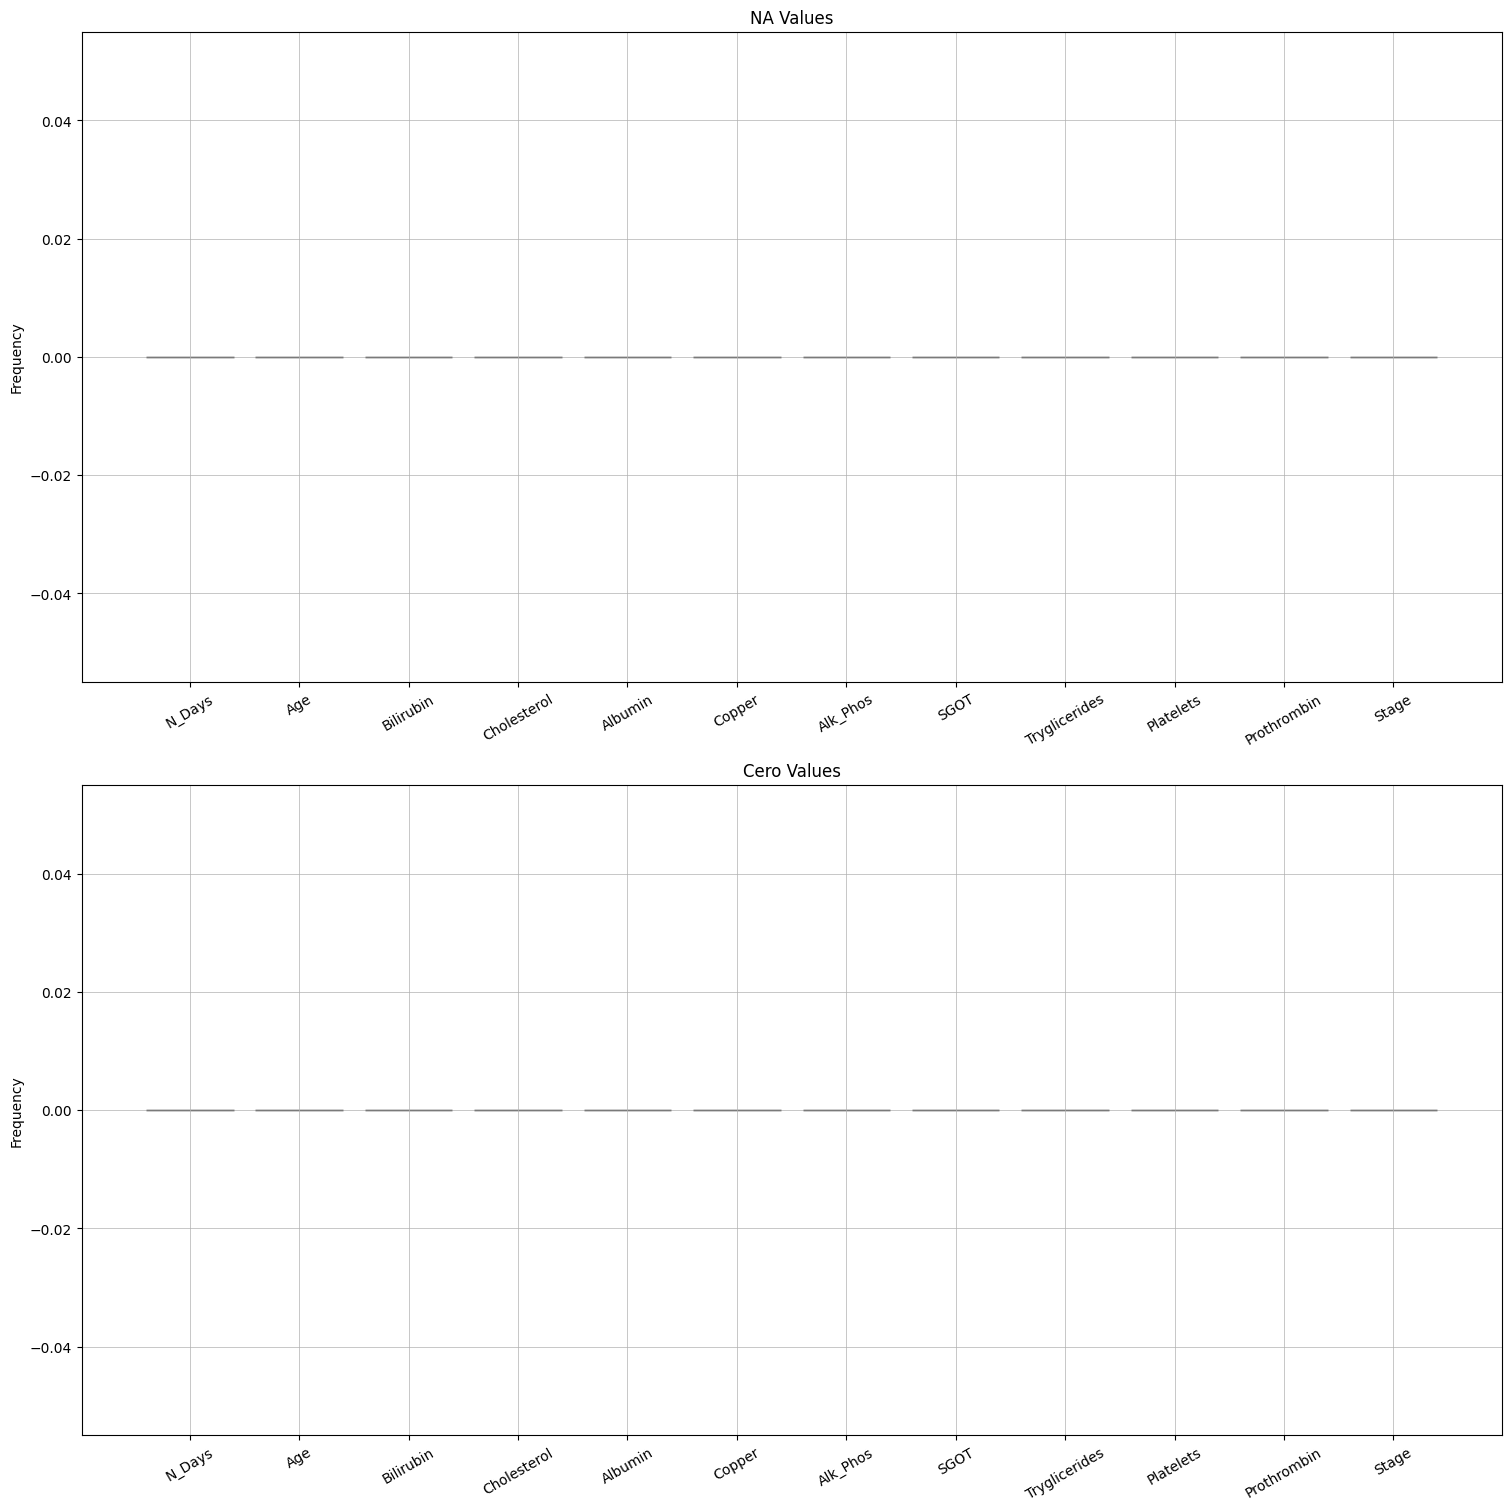

In [8]:
fture_num_df_info = train_eda.infonum

In [9]:
fture_num_df_info.head(12)

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
COUNT,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
MIN,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
MAX,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000
MEAN,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
STD,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
NA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NA %,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


EDA CONTINUAR ...

Tratamiento del desbalanceo de clases:

In [12]:
# Proporciones de las target clases dentro de la target feature para estudiar analiticamente el posible desbalanceo de clases 
for _ ,unique in enumerate(train_eda.data["Status"].unique()):
    print(f'Proporción de la clase {unique} : {round(100 *train_eda.data["Status"][train_eda.data["Status"]== unique].shape[0]/train_eda.data["Status"].shape[0],3)} %')


Proporción de la clase D : 33.713 %
Proporción de la clase C : 62.808 %
Proporción de la clase CL : 3.479 %


MUY DESBALANCEADO EN LA CLASE CL

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
X = train_eda.data.drop(columns = "Stage").values
y = train_eda.data["Stage"].values
encoder = OneHotEncoder()
X = encoder.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, shuffle=True, stratify = None)

In [ ]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(6324, 2536) (6324,) (1581, 2536) (1581,)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

tree = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=1)
ada = AdaBoostClassifier(estimator=tree, n_estimators=50, learning_rate=0.1, random_state=1)
rdf_tree = RandomForestClassifier(   
                                    n_estimators=100,
                                    criterion='entropy', 
                                    max_depth=10, 
                                    min_samples_split=3,
                                    bootstrap=True, 
                                    oob_score=False, 
                                    n_jobs=-1, 
                                    random_state=42, 
        
                                  )
"""column_tf = ColumnTransformer(
                                transformers= [ 
                                               ("cat_trf",OneHotEncoder(),train_eda.cat_cols)
                                               ],
                                remainder="passthrough"
                            )
pipe = Pipeline(
                    steps=[
                                ("transformer",column_tf),
                                ("estimator",ada)
                            ]
                    )
"""
pipe = Pipeline(
                    steps=[
                                ("estimator",ada)
                            ]
                    )

tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print(f"Decision tree train/test accuracies: {tree_train:,.3f}/{tree_test:,.3f}")

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)
ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)
print(f"AdaBoost train/test accuracies: {ada_train:,.3f}/{ada_test:,.3f}")

rdf_tree.fit(X_train, y_train)
y_train_pred = rdf_tree.predict(X_train)
y_test_pred = rdf_tree.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print(f"Decision tree train/test accuracies: {tree_train:,.3f}/{tree_test:,.3f}")

Decision tree train/test accuracies: 0.530/0.544


c:\Users\Koke\Desktop\MASTER_IA\TareaFinalSupervised\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost train/test accuracies: 0.526/0.563
Decision tree train/test accuracies: 0.557/0.567
